# Ehab Henein {-}

# Hospital Readmission{-}


## pre- configurations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# accessing directory structure

In [2]:
import os

# Update path to local directory
dataset_directory = './data/'
csv_file_path  = os.path.join(dataset_directory, 'diabetic_data.csv')


print (csv_file_path)

./data/diabetic_data.csv


In [3]:
# Ensure the file exists
if not os.path.exists(csv_file_path):
    # Notify if the file does not exist
    print(f"File '{csv_file_path}' does not exist.")
else:
    # Read the CSV file into a DataFrame
    db_data = pd.read_csv(csv_file_path)
    
    # Display the first 5 records
    print(db_data.head())  # Show the first 5 rows of the DataFrame

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [4]:
# Check for missing values and data types
db_data.info()

# Check for any duplicate rows
duplicate_rows = db_data[db_data.duplicated()]

# Display any duplicates found
duplicate_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [5]:
# Check for null values
null_values = db_data.isnull().sum()

# Display columns with null values
print("Null Values in the Dataset:")
print(null_values)



Null Values in the Dataset:
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride         

In [6]:
# Drop columns with null values
db_data = db_data.dropna(axis=1)

# Display the updated dataframe
print("Updated DataFrame after dropping columns with null values:")
print(db_data)

Updated DataFrame after dropping columns with null values:
        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

    

In [7]:
# Check for null values
null_values = db_data.isnull().sum()

# Display columns with null values
print("Null Values in the Dataset:")
print(null_values)

Null Values in the Dataset:
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazon

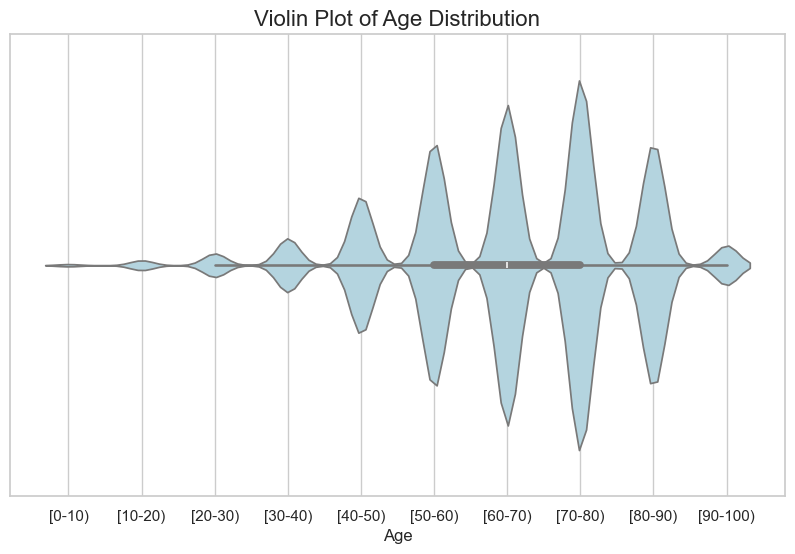

In [8]:
# ---- Visualizing Age Distribution with a Violin Plot ---- #
#
# Set the visual style for the seaborn plots to "whitegrid"
sns.set(style="whitegrid")

# Create a figure for the plot with a custom size (10 inches by 6 inches)
plt.figure(figsize=(10, 6))

# Create a violin plot to visualize the distribution of the 'age' column
sns.violinplot(x=db_data['age'], color='lightblue')

# Set the title of the plot with a font size of 16
plt.title('Violin Plot of Age Distribution', fontsize=16)

# Label the X-axis as 'Age' with a font size of 12
plt.xlabel('Age', fontsize=12)

# Display the plot
plt.show()




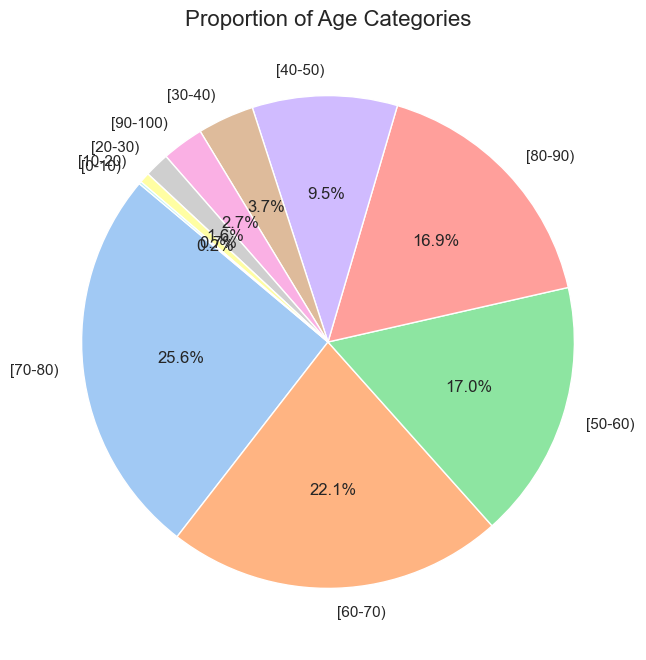

In [9]:
#---- Distribution of Age Categories in the Dataset ----#
# Group the data by age categories and count the occurrences in each category
age_counts = db_data['age'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Set the title of the pie chart
plt.title('Proportion of Age Categories', fontsize=16)

# Display the pie chart
plt.show()


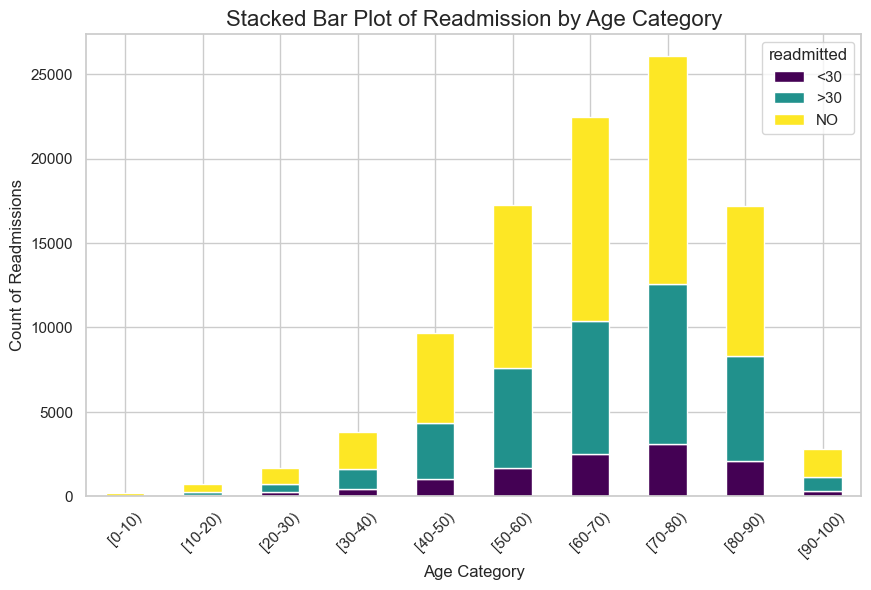

In [10]:
#---- Readmission Trends Across Age Categories: Stacked Bar Chart ----#
# Create a crosstab of 'age' and 'readmitted'
age_vs_readmitted = pd.crosstab(db_data['age'], db_data['readmitted'])

# Plot a stacked bar chart
age_vs_readmitted.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Set the title of the plot
plt.title('Stacked Bar Plot of Readmission by Age Category', fontsize=16)

# Set the X and Y axis labels
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Count of Readmissions', fontsize=12)

# Rotate X-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

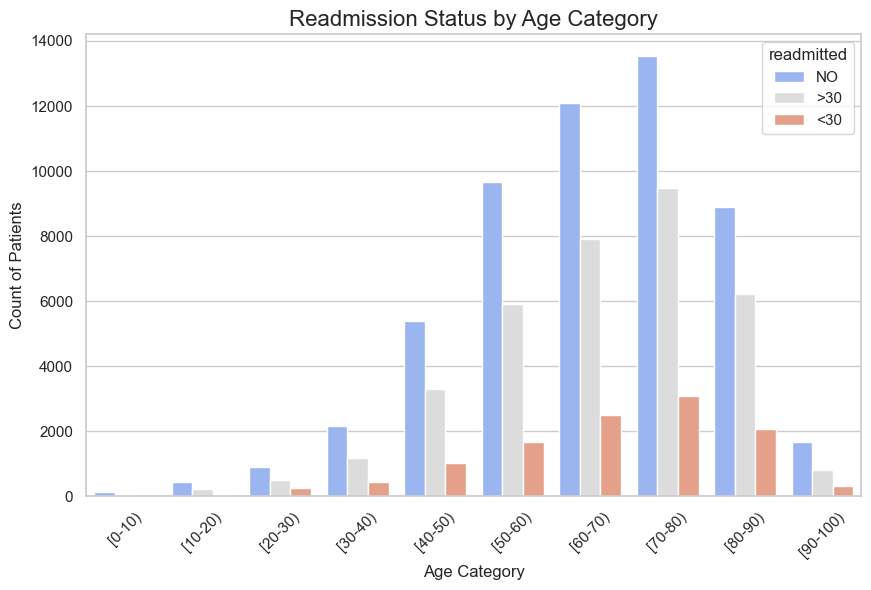

In [11]:
# ---- Patient Readmission Rates Across Age Categories ----#
# Create a count plot of age category with hue for readmission status
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=db_data, palette='coolwarm')

# Set the title and axis labels
plt.title('Readmission Status by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()




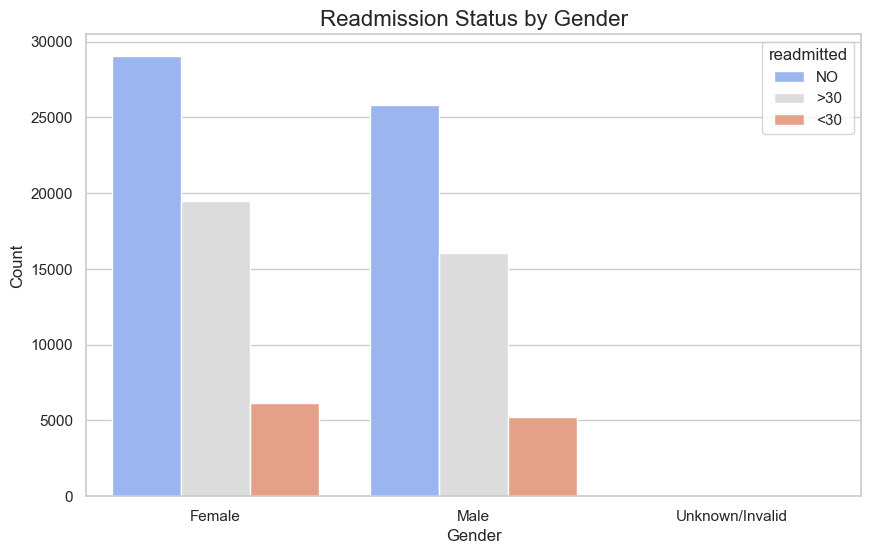

In [12]:
#---- Gender-Based Analysis of Patient Readmission Rates ----#
# Create a bar plot of readmission status by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='readmitted', data=db_data, palette='coolwarm')

# Set the title and axis labels
plt.title('Readmission Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


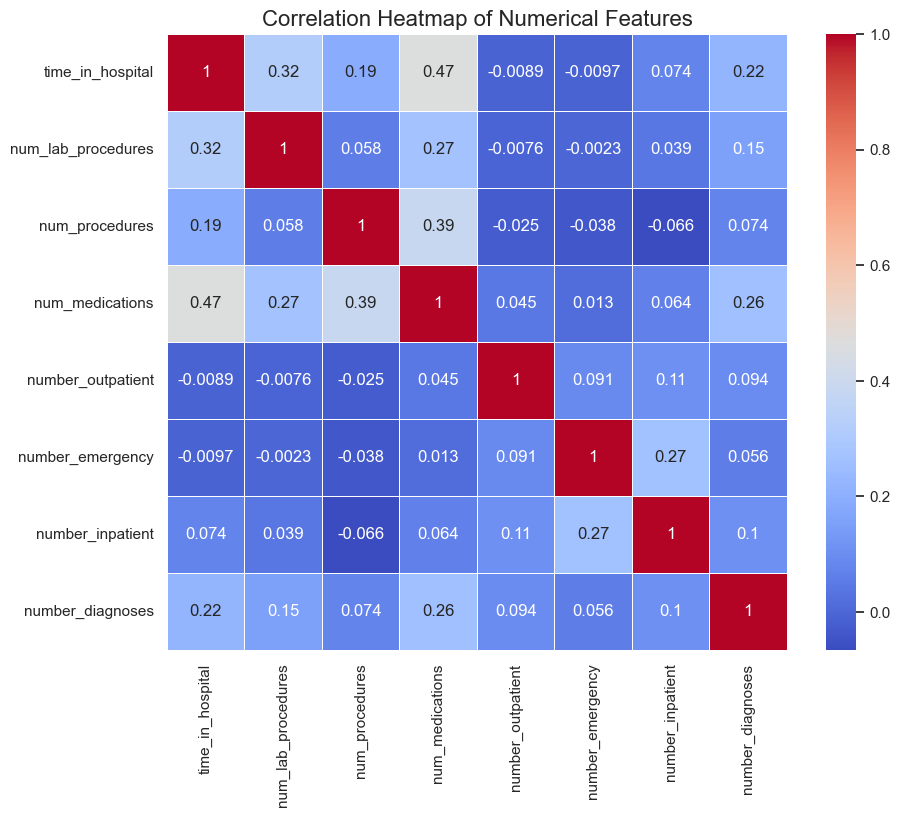

In [13]:
#---- Correlation Heatmap of Key Numerical Features in Patient Data ----#
# Select only numerical columns for correlation matrix
numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                  'num_medications', 'number_outpatient', 'number_emergency', 
                  'number_inpatient', 'number_diagnoses']

# Create a correlation matrix
corr_matrix = db_data[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Display the heatmap
plt.show()



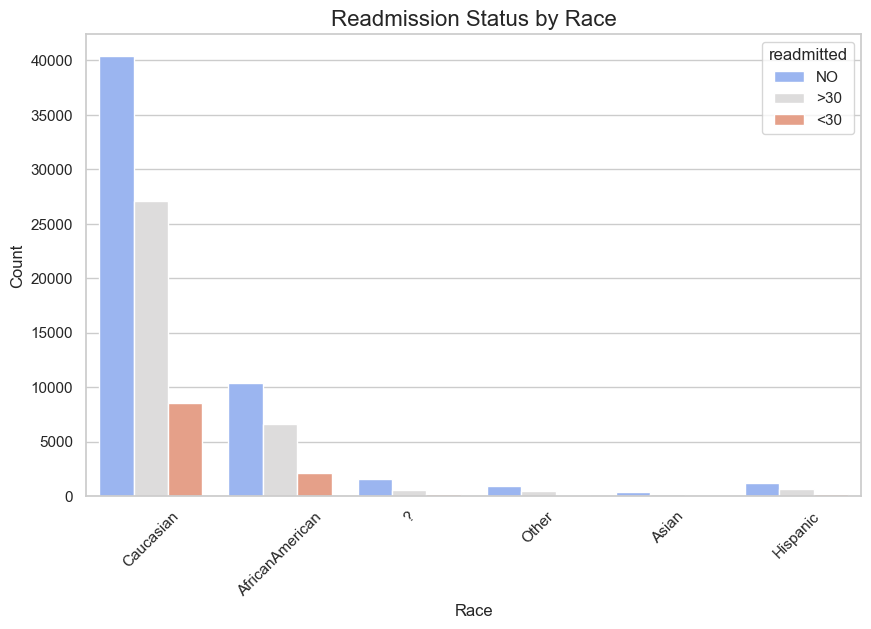

In [14]:
# Create a count plot of race by readmission status
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted', data=db_data, palette='coolwarm')

# Set the title and axis labels
plt.title('Readmission Status by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


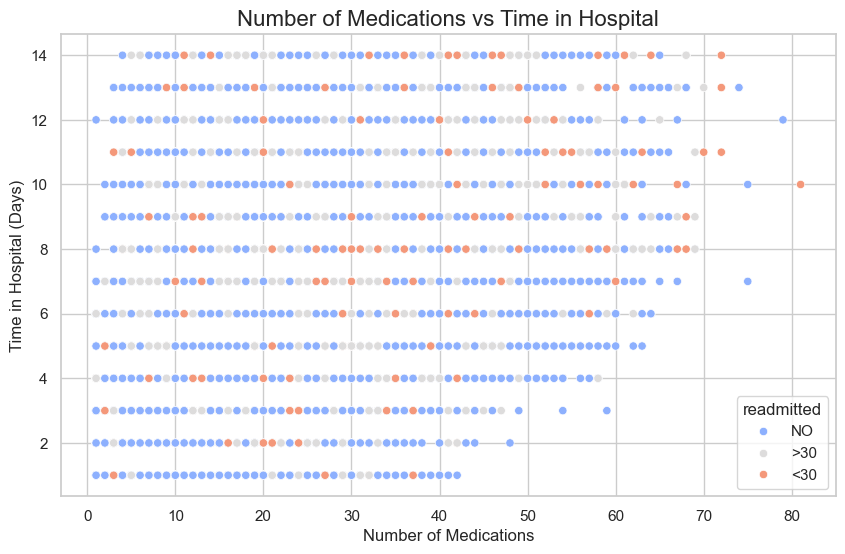

In [15]:
# Create a scatter plot of number of medications vs time in hospital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_medications', y='time_in_hospital', hue='readmitted', data=db_data, palette='coolwarm')

# Set the title and axis labels
plt.title('Number of Medications vs Time in Hospital', fontsize=16)
plt.xlabel('Number of Medications', fontsize=12)
plt.ylabel('Time in Hospital (Days)', fontsize=12)

# Display the plot
plt.show()


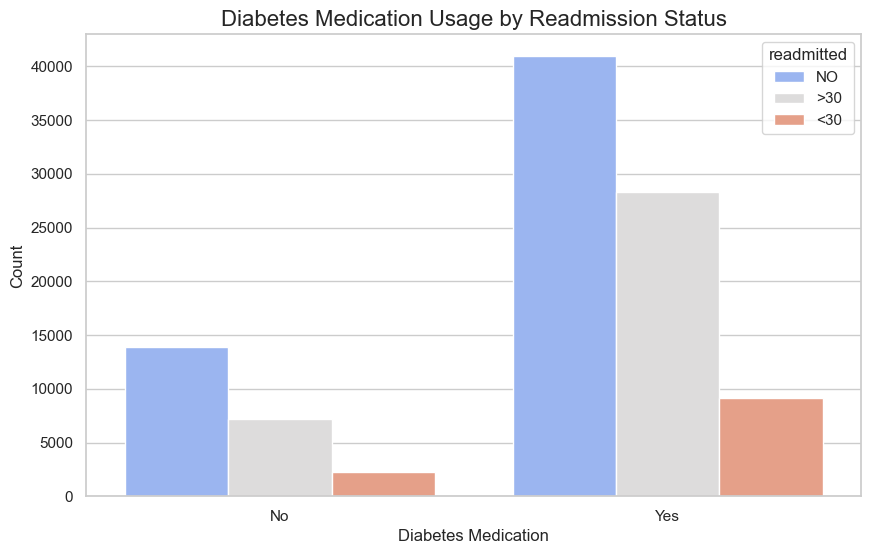

In [16]:
# Create a bar plot of diabetesMed usage by readmission status
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesMed', hue='readmitted', data=db_data, palette='coolwarm')

# Set the title and axis labels
plt.title('Diabetes Medication Usage by Readmission Status', fontsize=16)
plt.xlabel('Diabetes Medication', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


In [17]:
# Selecting the relevant columns and performing the required transformations
selected_columns = ['age', 'time_in_hospital', 'num_lab_procedures', 'diag_1',
                    'num_medications', 'number_diagnoses', 'diabetesMed', 'readmitted', 'admission_type_id']

# Subset the data to the selected columns
db_data_selected = db_data[selected_columns]

# db_data_selected.to_csv('output_data.csv', index=False)

In [18]:
import pandas as pd

# Ensure db_data_selected is a copy to avoid SettingWithCopyWarning
db_data_selected = db_data_selected.copy()

# Define the mapping function for ICD code ranges
def encode_diagnosis(code):
    try:
        code = int(code)  # Convert code to integer if it's numeric
    except:
        return 'Unknown'  # For non-numeric codes, assign 'Unknown'
    
    if 1 <= code <= 139:
        return 'Infectious Diseases'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    elif 240 <= code <= 279:
        return 'Endocrine, Nutritional, Metabolic Diseases'
    elif 280 <= code <= 289:
        return 'Blood Diseases'
    elif 290 <= code <= 319:
        return 'Mental Disorders'
    elif 320 <= code <= 389:
        return 'Nervous System Diseases'
    elif 390 <= code <= 459:
        return 'Circulatory System Diseases'
    elif 460 <= code <= 519:
        return 'Respiratory System Diseases'
    elif 520 <= code <= 579:
        return 'Digestive System Diseases'
    elif 580 <= code <= 629:
        return 'Genitourinary System Diseases'
    elif 630 <= code <= 679:
        return 'Pregnancy Complications'
    elif 680 <= code <= 709:
        return 'Skin Diseases'
    elif 710 <= code <= 739:
        return 'Musculoskeletal Diseases'
    elif 740 <= code <= 759:
        return 'Congenital Anomalies'
    elif 780 <= code <= 799:
        return 'Symptoms, Signs, Ill-defined'
    elif 800 <= code <= 999:
        return 'Injury and Poisoning'
    else:
        return 'Other'
    
# Apply the encoding function to 'diag_1' column
db_data_selected['diag_1_encoded'] = db_data_selected['diag_1'].apply(encode_diagnosis)

# One-hot encode 'diag_1_encoded' and join it with db_data_selected
db_data_selected = pd.get_dummies(db_data_selected, columns=['diag_1_encoded'], prefix='diag1')

# Drop the original 'diag_1' column since we now have one-hot encoded columns
db_data_selected.drop(columns=['diag_1'], inplace=True)

# Check the first few rows to ensure the transformation is correct
print(db_data_selected.head())


       age  time_in_hospital  num_lab_procedures  num_medications  \
0   [0-10)                 1                  41                1   
1  [10-20)                 3                  59               18   
2  [20-30)                 2                  11               13   
3  [30-40)                 2                  44               16   
4  [40-50)                 1                  51                8   

   number_diagnoses diabetesMed readmitted  admission_type_id  \
0                 1          No         NO                  6   
1                 9         Yes        >30                  1   
2                 6         Yes         NO                  1   
3                 7         Yes         NO                  1   
4                 5         Yes         NO                  1   

   diag1_Blood Diseases  diag1_Circulatory System Diseases  ...  \
0                 False                              False  ...   
1                 False                              False  

In [19]:
# Transform the 'readmitted' column using .loc to avoid the warning
db_data_selected.loc[:, 'readmitted'] = db_data_selected['readmitted'].apply(lambda x: 1 if x in ['<30', '>30'] else 0)

# Check the value counts to ensure transformation is correct
readmitted_counts = db_data_selected['readmitted'].value_counts()
print(readmitted_counts)



readmitted
0    54864
1    46902
Name: count, dtype: int64


In [20]:
# Transforming the 'diabetesMed' column: Set 'Yes' to 1 and 'No' to 0
db_data_selected.loc[:, 'diabetesMed'] = db_data_selected['diabetesMed'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check the transformation by displaying value counts for 'diabetesMed'
diabetesMed_counts = db_data_selected['diabetesMed'].value_counts()

diabetesMed_counts

diabetesMed
1    78363
0    23403
Name: count, dtype: int64

In [21]:
# Binning the 'number_diagnoses' column into groups: low, medium, and high
# Low: 1-5, Medium: 6-10, High: 11-16

bins = [0, 5, 10, 16]
labels = ['Low', 'Medium', 'High']

# Create a new binned column for 'number_diagnoses' using assign to avoid SettingWithCopyWarning
db_data_selected = db_data_selected.assign(
    number_diagnoses_binned=pd.cut(db_data_selected['number_diagnoses'], bins=bins, labels=labels)
)


# Check the value counts to ensure transformation is correct
readmitted_counts = db_data_selected['readmitted'].value_counts()
print(readmitted_counts)

# Check the first few rows to confirm the encoding
db_data_selected.head()



readmitted
0    54864
1    46902
Name: count, dtype: int64


,age,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,diabetesMed,readmitted,admission_type_id,diag1_Blood Diseases,diag1_Circulatory System Diseases,...,diag1_Mental Disorders,diag1_Musculoskeletal Diseases,diag1_Neoplasms,diag1_Nervous System Diseases,diag1_Pregnancy Complications,diag1_Respiratory System Diseases,diag1_Skin Diseases,"diag1_Symptoms, Signs, Ill-defined",diag1_Unknown,number_diagnoses_binned
0,[0-10),1,41,1,1,0,0,6,False,False,...,False,False,False,False,False,False,False,False,True,Low
1,[10-20),3,59,18,9,1,1,1,False,False,...,False,False,False,False,False,False,False,False,False,Medium
2,[20-30),2,11,13,6,1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,Medium
3,[30-40),2,44,16,7,1,0,1,False,False,...,False,False,False,False,False,False,False,False,False,Medium
4,[40-50),1,51,8,5,1,0,1,False,False,...,False,False,True,False,False,False,False,False,False,Low


In [22]:
# Ordinal encoding for the 'number_diagnoses_binned' column
# Assigning 'Low' = 1, 'Medium' = 2, 'High' = 3

ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

db_data_selected = db_data_selected.assign(number_diagnoses_binned_encoded=db_data_selected['number_diagnoses_binned'].map(ordinal_mapping))

# Check the transformation by displaying value counts for the encoded column
number_diagnoses_encoded_counts = db_data_selected['number_diagnoses_binned_encoded'].value_counts()

number_diagnoses_encoded_counts


number_diagnoses_binned_encoded
2    80661
1    21007
3       98
Name: count, dtype: int64

In [23]:
# Dropping the original 'number_diagnoses' and 'number_diagnoses_binned' columns
db_data_selected = db_data_selected.drop(columns=['number_diagnoses', 'number_diagnoses_binned'])

# Renaming the encoded column to 'number_diagnoses'
db_data_selected = db_data_selected.rename(columns={'number_diagnoses_binned_encoded': 'number_diagnoses'})

# Check the cleaned dataset to verify changes
db_data_selected.head()


,age,time_in_hospital,num_lab_procedures,num_medications,diabetesMed,readmitted,admission_type_id,diag1_Blood Diseases,diag1_Circulatory System Diseases,diag1_Congenital Anomalies,...,diag1_Mental Disorders,diag1_Musculoskeletal Diseases,diag1_Neoplasms,diag1_Nervous System Diseases,diag1_Pregnancy Complications,diag1_Respiratory System Diseases,diag1_Skin Diseases,"diag1_Symptoms, Signs, Ill-defined",diag1_Unknown,number_diagnoses
0,[0-10),1,41,1,0,0,6,False,False,False,...,False,False,False,False,False,False,False,False,True,1
1,[10-20),3,59,18,1,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,2
2,[20-30),2,11,13,1,0,1,False,False,False,...,False,False,False,False,True,False,False,False,False,2
3,[30-40),2,44,16,1,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,2
4,[40-50),1,51,8,1,0,1,False,False,False,...,False,False,True,False,False,False,False,False,False,1


In [24]:

# Using Equal Frequency Binning (quantile-based) for 'num_lab_procedures'
db_data_selected['num_lab_procedures_binned'] = pd.qcut(db_data_selected['num_lab_procedures'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Check the transformation by displaying value counts for the binned column
num_lab_procedures_binned_counts = db_data_selected['num_lab_procedures_binned'].value_counts()

num_lab_procedures_binned_counts


num_lab_procedures_binned
Medium       26303
High         25594
Low          25512
Very High    24357
Name: count, dtype: int64

In [25]:
# Applying equal frequency binning for 'num_medications' and 'time_in_hospital'

# Binning 'num_medications' into 4 equal frequency groups (quartiles)
db_data_selected['num_medications_binned'] = pd.qcut(db_data_selected['num_medications'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Binning 'time_in_hospital' into 3 equal frequency groups (tertiles)
db_data_selected['time_in_hospital_binned'] = pd.qcut(db_data_selected['time_in_hospital'], q=3, labels=['Short Stay', 'Medium Stay', 'Long Stay'])

# Check the transformation by displaying value counts for the binned columns
num_medications_binned_counts = db_data_selected['num_medications_binned'].value_counts()
time_in_hospital_binned_counts = db_data_selected['time_in_hospital_binned'].value_counts()

num_medications_binned_counts, time_in_hospital_binned_counts


(num_medications_binned
 Medium       29384
 Low          25861
 Very High    23880
 High         22641
 Name: count, dtype: int64,
 time_in_hospital_binned
 Short Stay     49188
 Long Stay      28688
 Medium Stay    23890
 Name: count, dtype: int64)

In [26]:
# Replacing the original columns with the binned versions by renaming them back to 'num_medications' and 'time_in_hospital'

db_data_selected = db_data_selected.drop(columns=['num_medications', 'time_in_hospital'])
db_data_selected = db_data_selected.rename(columns={'num_medications_binned': 'num_medications', 'time_in_hospital_binned': 'time_in_hospital'})

# Checking the first few rows to ensure the renaming was successful
db_data_selected.head()


,age,num_lab_procedures,diabetesMed,readmitted,admission_type_id,diag1_Blood Diseases,diag1_Circulatory System Diseases,diag1_Congenital Anomalies,diag1_Digestive System Diseases,"diag1_Endocrine, Nutritional, Metabolic Diseases",...,diag1_Nervous System Diseases,diag1_Pregnancy Complications,diag1_Respiratory System Diseases,diag1_Skin Diseases,"diag1_Symptoms, Signs, Ill-defined",diag1_Unknown,number_diagnoses,num_lab_procedures_binned,num_medications,time_in_hospital
0,[0-10),41,0,0,6,False,False,False,False,False,...,False,False,False,False,False,True,1,Medium,Low,Short Stay
1,[10-20),59,1,1,1,False,False,False,False,True,...,False,False,False,False,False,False,2,Very High,High,Short Stay
2,[20-30),11,1,0,1,False,False,False,False,False,...,False,True,False,False,False,False,2,Low,Medium,Short Stay
3,[30-40),44,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,2,Medium,High,Short Stay
4,[40-50),51,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,1,High,Low,Short Stay


In [27]:

# Mapping 'Low' = 1, 'Medium' = 2, 'High' = 3, 'Very High' = 4 for 'num_lab_procedures_binned'
procedures_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
db_data_selected['num_lab_procedures'] = db_data_selected['num_lab_procedures_binned'].map(procedures_mapping)

# drop the old 'num_lab_procedures_binned' column, you can do:
db_data_selected = db_data_selected.drop(columns=['num_lab_procedures_binned'])


# Encoding the binned categorical variables 'num_medications' and 'time_in_hospital' to numeric values
# Mapping 'Low' = 1, 'Medium' = 2, 'High' = 3, 'Very High' = 4
medications_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
db_data_selected['num_medications'] = db_data_selected['num_medications'].map(medications_mapping)

# Mapping 'Short Stay' = 1, 'Medium Stay' = 2, 'Long Stay' = 3
hospital_stay_mapping = {'Short Stay': 1, 'Medium Stay': 2, 'Long Stay': 3}
db_data_selected['time_in_hospital'] = db_data_selected['time_in_hospital'].map(hospital_stay_mapping)





In [28]:
# One-hot encode 'age'
db_data_selected = pd.get_dummies(db_data_selected, columns=['age'], prefix=[ 'age'])


# Scaling numeric features 
from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling (excluding already binary columns)
numeric_features = ['num_lab_procedures', 'number_diagnoses', 'num_medications', 'time_in_hospital']
scaler = StandardScaler()
db_data_selected[numeric_features] = scaler.fit_transform(db_data_selected[numeric_features])

# Convert boolean columns to integers (0 and 1)
bool_columns = db_data_selected.select_dtypes(include='bool').columns
db_data_selected[bool_columns] = db_data_selected[bool_columns].astype(int)


# Check the prepared data
print(db_data_selected.head())


   num_lab_procedures diabetesMed readmitted  admission_type_id  \
0           -0.432405           0          0                  6   
1            1.371190           1          1                  1   
2           -1.334202           1          0                  1   
3           -0.432405           1          0                  1   
4            0.469393           1          0                  1   

   diag1_Blood Diseases  diag1_Circulatory System Diseases  \
0                     0                                  0   
1                     0                                  0   
2                     0                                  0   
3                     0                                  0   
4                     0                                  0   

   diag1_Congenital Anomalies  diag1_Digestive System Diseases  \
0                           0                                0   
1                           0                                0   
2                         

In [29]:
import pandas as pd
import numpy as np

# Perform correlation analysis to identify strong relationships between features
correlation_matrix = db_data_selected.corr()

# Get the absolute values of the correlation matrix to sort correlations
correlation_pairs = correlation_matrix.abs().unstack()

# Drop self-correlations (where a feature is correlated with itself)
correlation_pairs = correlation_pairs[correlation_pairs != 1]

# Sort correlation pairs by the highest correlation values
sorted_correlations = correlation_pairs.sort_values(ascending=False)

# Display the top 20 highest correlations (positive and negative)
top_correlations = sorted_correlations.head(20)

# Calculate variance for each feature to identify low-variance columns
feature_variance = db_data_selected.var()

# Print top correlations and variance of features
print("Top Correlations:\n", top_correlations)
print("\nFeature Variance:\n", feature_variance)

# Select the upper triangle of the correlation matrix to avoid duplicate pairs
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8 (highly correlated)
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Drop highly correlated features from the dataset
db_data_selected = db_data_selected.drop(columns=highly_correlated_features)

# Output the list of removed features
print("Removed highly correlated features:", highly_correlated_features)




Top Correlations:
 num_medications                    time_in_hospital                     0.414964
time_in_hospital                   num_medications                      0.414964
age_[60-70)                        age_[70-80)                          0.312499
age_[70-80)                        age_[60-70)                          0.312499
time_in_hospital                   num_lab_procedures                   0.296494
num_lab_procedures                 time_in_hospital                     0.296494
age_[20-30)                        diag1_Pregnancy Complications        0.276696
diag1_Pregnancy Complications      age_[20-30)                          0.276696
age_[50-60)                        age_[70-80)                          0.265172
age_[70-80)                        age_[50-60)                          0.265172
                                   age_[80-90)                          0.264626
age_[80-90)                        age_[70-80)                          0.264626
age_[60-7

In [30]:
# db_data_selected.to_csv('output_data_slected.csv', index=False)

In [31]:
# Step 1: Ensure all features are numeric and target 'readmitted' is properly encoded
X = db_data_selected.drop(columns=['readmitted'])  # Features (dropping the target column)
y = db_data_selected['readmitted'].astype(int)  # Target variable as integers (0, 1)

# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Logistic Regression model without 'multi_class' argument
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Step 5: Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)



Accuracy: 0.5663751596737742
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.69      0.63     10952
           1       0.54      0.43      0.48      9402

    accuracy                           0.57     20354
   macro avg       0.56      0.56      0.55     20354
weighted avg       0.56      0.57      0.56     20354



**Overall Accuracy**

Accuracy: 0.57 (57%). This indicates that 57% of the predictions were correct across all classes. While the model performs slightly better than random guessing, there is room for improvement.
Class-Specific Metrics

For each class (0 and 1), the report shows:

1. Class 0 (non-readmitted cases):
   - Precision: 0.58 this means 58% of instances predicted as non-readmitted were correct.
   - Recall: 0.69 Of all actual non-readmitted cases, 69% were correctly identified.
   - F1-Score: 0.63 A balanced measure of precision and recall, indicating reasonable performance for identifying non-readmitted cases.
2. Class 1 (readmitted cases):
   - Precision: 0.54 Here, 54% of the instances predicted as readmitted were correct.
   - Recall: 0.43 Only 43% of all actual readmitted cases were identified correctly, suggesting that the model struggles more with this class.
   - F1-Score: 0.48 This indicates weaker performance in identifying readmitted cases, particularly low recall.

**Average Metrics**

-     **Macro Average:** A simple average across both classes (0.56 for precision, recall, and 0.55 for F1-score), treating each class equally.
-     **Weighted Average:** An average weighted by the number of instances per class often used in imbalanced datasets. Here, it reflects precision and recall that are close to overall accuracy.

**Summary**
The model better detects non-readmitted cases than readmitted ones, as shown by the higher recall and F1 scores for class 0. To improve, the model may need further tuning, feature engineering, or adjustments to focus on enhancing recall for the readmitted class.


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# 'X' is the feature matrix and 'y' is the target variable (after any necessary preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
# Display the top 20 highest correlations (positive and negative)
print("Top Correlations:\n", top_correlations)

Accuracy: 0.5464282204971995
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.60      0.59     10952
           1       0.51      0.48      0.49      9402

    accuracy                           0.55     20354
   macro avg       0.54      0.54      0.54     20354
weighted avg       0.54      0.55      0.55     20354

Top Correlations:
 num_medications                    time_in_hospital                     0.414964
time_in_hospital                   num_medications                      0.414964
age_[60-70)                        age_[70-80)                          0.312499
age_[70-80)                        age_[60-70)                          0.312499
time_in_hospital                   num_lab_procedures                   0.296494
num_lab_procedures                 time_in_hospital                     0.296494
age_[20-30)                        diag1_Pregnancy Complications        0.276696
diag1_Pregnancy Complications     

**Overall Accuracy**

Accuracy: 0.55 (55%): The model correctly predicted 55% of cases overall, which suggests it performs slightly better than random guessing but still has substantial room for improvement.
Class-Specific Metrics

**For each class (0 and 1), the report provides the following:**

**Class 0 (non-readmitted cases):**

- Precision: 0.57 This means 57% of cases predicted as non-readmitted were accurate.
- Recall: 0.60 Of all actual non-readmitted cases, 60% were correctly identified.
- F1-Score: 0.59 Balancing precision and recall, this indicates reasonable performance for detecting non-readmitted cases, though there’s room to improve recall.

**Class 1 (readmitted cases):**

- Precision: 0.51 About 51% of cases predicted as readmitted were actually readmitted.
- Recall: 0.48 The model correctly identified 48% of actual readmitted cases, indicating it struggles to detect these cases accurately.
- F1-Score: 0.49 This score shows weaker performance for detecting readmitted cases, with both precision and recall relatively low.

**Average Metrics**

- Macro Average: The unweighted average across both classes (0.54 for precision, recall, and F1-score). It treats both classes equally, showing an overall modest performance.
- Weighted Average: Averages weighted by the number of instances per class, providing a similar view as the accuracy, around 55%.

**Summary**
The model shows moderate performance, with better results for non-readmitted cases (class 0) than for readmitted cases (class 1). Given the low recall for class 1, the model may benefit from strategies like rebalancing the classes, adjusting model parameters, or adding relevant features to improve its sensitivity to readmitted cases.
